# Exercise 2: Decision Trees

In this assignment you will implement a Decision Tree algorithm as learned in class.

## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
2. Write vectorized code whenever possible.
3. You are responsible for the correctness of your code and should add as many tests as you see fit. Tests will not be graded nor checked.
4. Write your functions in the provided `hw2.py` python module only. All the logic you write is imported and used in this jupyter notebook.
5. You are allowed to use functions and methods from the [Python Standard Library](https://docs.python.org/3/library/) and [numpy](https://www.numpy.org/devdocs/reference/) only. Any other imports detected in `hw2.py` will earn you the grade of 0, even if you only used them for testing.
6. Your code must run without errors. During the environment setup, you were given a specific version of `numpy` to install. Changes of the configuration we provided are at your own risk. Code that cannot run will also earn you the grade of 0.
7. Write your own code. Cheating will not be tolerated. 
8. Submission includes the `hw2.py` file and this notebook. Answers to qualitative questions should be written in markdown cells (with $\LaTeX$ support).
9. You are allowed to include additional functions.
10. Submission: zip only the completed jupyter notebook and the python file `hw2.py`. Do not include the data or any directories. Name the file `ID1_ID2.zip` and submit only one copy of the assignment.

## In this exercise you will perform the following:
1. Practice OOP in python.
2. Implement two impurity measures: Gini and Entropy.
3. Implement a decision tree from scratch.
4. Prune the tree to achieve better results.
5. Visualize your results and the tree.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hw2 import * # this imports all functions from hw2.

# make matplotlib figures appear inline in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Make the notebook automatically reload external python modules
%load_ext autoreload
%autoreload 2

## Warmup - OOP in python

Our decision tree will be implemented using a dedicated python class. Python classes are very similar to classes in Java.


You can use the following [site](https://jeffknupp.com/blog/2014/06/18/improve-your-python-python-classes-and-object-oriented-programming/) to learn about classes in python.

In [2]:
class Node(object):
    def __init__(self, data):
        self.data = data
        self.children = []

    def add_child(self, node):
        self.children.append(node)

In [3]:
n = Node(5)
p = Node(6)
q = Node(7)
n.add_child(p)
n.add_child(q)
n.children

[<__main__.Node at 0x1101371d0>, <__main__.Node at 0x110137278>]

## Data preprocessing

We will use the breast cancer dataset that is available as a part of sklearn - a popular machine learning and data science library in python. In this example, our dataset will be a single matrix with the **labels on the last column**. Notice that you are not allowed to use additional functions from sklearn.

In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# load dataset
X, y = datasets.load_breast_cancer(return_X_y = True)
X = np.column_stack([X,y]) # the last column holds the labels

# split dataset
X_train, X_test = train_test_split(X, random_state=99)

print("Training dataset shape: ", X_train.shape)
print("Testing dataset shape: ", X_test.shape)

Training dataset shape:  (426, 31)
Testing dataset shape:  (143, 31)


## Impurity Measures

Implement the functions `calc_gini` (5 points) and `calc_entropy` (5 points) in the python file `hw2.py`. You are encouraged to test your implementation using the cell below.

In [5]:
print("impurity by gini formula is:", calc_gini(X_train))
print("impurity by entropy formula is:",calc_entropy(X_train))


impurity by gini formula is: 0.47768299940488
impurity by entropy formula is: 0.9675594819018212


## Building a Decision Tree

Use a Python class to construct the decision tree (look at the `DecisionNode` class in the python file `hw2.py`. Your class should support the following functionality:

1. Initiating a node for a decision tree. You will need to use several class methods and class attributes and you are free to use them as you see fit. We recommend that every node will hold the feature and value used for the split and its children.
2. Your code should support both Gini and Entropy as impurity measures. 
3. The provided data includes continuous data. In this exercise, create at most a single split for each node of the tree. The threshold you need to use for this exercise are the average of each consecutive pair of values. For example, assume some features contains the following values: [1,2,3,4,5]. You should use the following thresholds [1.5, 2.5, 3.5, 4.5]. 
4. When constructing the tree, test all possible thresholds for each feature. The stopping criteria is a pure tree.

Complete the class `DecisionNode` in the python file `hw2.py`. The structure of this class is entirely up to you. Complete the function `build_tree` in the python file `hw2.py`. This function should get the training dataset and the impurity as inputs, initiate a root for the decision tree and construct the tree according to the procedure you learned in class. (30 points).

In [18]:
tree_gini = build_tree(data=X_train, impurity=calc_gini) 
tree_entropy = build_tree(data=X_train, impurity=calc_entropy)


## Tree evaluation

Complete the functions `predict` and `calc_accuracy` in the python file `hw2.py`. You are allowed to implement this functionality as a class method.

After building both trees using the training set (using Gini and Entropy as impurity measures), you should calculate the accuracy on the test set and print the measure that gave you the best test accuracy. For the rest of the exercise, use that impurity measure. (10 points)

In [21]:
print(calc_accuracy(tree_entropy,X_test))

93.7062937062937


## Chi square pre-pruning

Consider the following p-value cut-off values: [1 (no pruning), 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00001]. For each value, construct a tree and prune it according to the cut-off value. Next, calculate the training and testing accuracy. On a single plot, draw the training and testing accuracy as a function of the p-value. What p-value gives you the best results? Does the results support the theory you learned in class regarding Chi square pruning? Explain. (20 points)

**Note**: You need to change the `DecisionNode` to support Chi square pruning. Make sure the `chi_value=1` corresponds to no pruning. The values you need from the Chi square table are available in the python file `hw2.py`.

In [8]:
training = []
testing  = []
array = [1, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00001]
import time
start_time = time.time()
for chi_value in array:
    print ("chi value is: ", chi_value)
    testRoot = build_tree(X_train, calc_entropy, chi_value)
    x = calc_accuracy(testRoot, X_test)
    print("test:" ,x)
    testing.append(x)
    
for chi_value in array:
    print ("chi value is: ", chi_value)
    trainRoot = build_tree(X_train, calc_entropy, chi_value)
    y = calc_accuracy(trainRoot, X_train)
    print("train:" , y)
    training.append(y)

    
print("--- %s seconds ---" % (time.time() - start_time))

chi value is:  1
test: 93.7062937062937
chi value is:  0.01
test: 94.4055944055944
chi value is:  0.005
test: 94.4055944055944
chi value is:  0.001
test: 91.6083916083916
chi value is:  0.0005
test: 91.6083916083916
chi value is:  0.0001
test: 92.3076923076923
chi value is:  1e-05
test: 92.3076923076923
chi value is:  1
train: 99.53051643192488
chi value is:  0.01
train: 99.29577464788733
chi value is:  0.005
train: 98.59154929577466
chi value is:  0.001
train: 96.47887323943662
chi value is:  0.0005
train: 96.47887323943662
chi value is:  0.0001
train: 95.30516431924883
chi value is:  1e-05
train: 95.30516431924883
--- 82.9908230304718 seconds ---


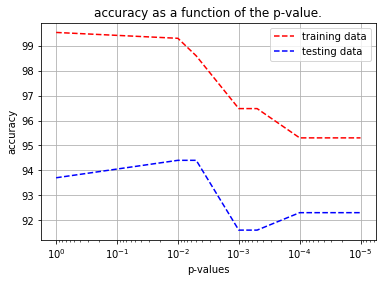

In [9]:
plt.plot(array, training, 'r--')
plt.plot(array, testing,'b--')
plt.grid(True)
plt.xscale('log')
plt.xlabel('p-values')
plt.ylabel('accuracy')
plt.title('accuracy as a function of the p-value.')
plt.legend(['training data', 'testing data'])
plt.gca().invert_xaxis()
plt.show()

In [10]:
""""The best result is given by chi value 0.01, the result supports the theory that we learned in class
that pruning improves the tree classification to a certain level, if we prune to many branches we will damage
the classification - the smaller the chi value is the more branches the tree will prune.
hence the result that we recieved supports the result, it's ideal and if we will take a smaller chi value we
will damage the classification, as seen clearly on graph"""







'"The best result is given by chi value 0.01, the result supports the theory that we learned in class\nthat pruning improves the tree classification to a certain level, if we prune to many branches we will damage\nthe classification - the smaller the chi value is the more branches the tree will prune.\nhence the result that we recieved supports the result, it\'s ideal and if we will take a smaller chi value we\nwill damage the classification, as seen clearly on graph'

## Post pruning

Construct a decision tree without Chi square pruning. For each leaf in the tree, calculate the test accuracy of the tree assuming no split occurred on the parent of that leaf and find the best such parent (in the sense that not splitting on that parent results in the best testing accuracy among possible parents). Make that parent into a leaf and repeat this process until you are left with just the root. On a single plot, draw the training and testing accuracy as a function of the number of internal nodes in the tree. Explain the results: what would happen to the training and testing accuracies when you remove nodes from the tree? Can you suggest a different approach to achieve better results? (20 points)

In [24]:
# pruning the tree
tree_entropy_train = build_tree(data=X_train, impurity=calc_entropy)
tree_entropy_test = build_tree(data=X_train, impurity=calc_entropy)
array, training = post_pruning(tree_entropy_train,X_train)
array, testing = post_pruning(tree_entropy_test,X_test)
print(array)
print(training)
print(array, testing)


[15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
[100.0, 99.76525821596243, 99.53051643192488, 99.29577464788733, 99.06103286384976, 98.82629107981221, 98.82629107981221, 98.82629107981221, 98.12206572769952, 97.41784037558685, 97.41784037558685, 96.47887323943662, 95.30516431924883, 94.83568075117371, 92.72300469483568, 60.56338028169014]
[15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0] [93.7062937062937, 94.4055944055944, 94.4055944055944, 94.4055944055944, 94.4055944055944, 94.4055944055944, 94.4055944055944, 94.4055944055944, 94.4055944055944, 94.4055944055944, 93.00699300699301, 93.7062937062937, 92.3076923076923, 93.00699300699301, 89.5104895104895, 69.23076923076923]


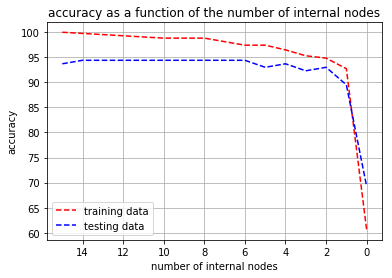

In [27]:
#plotting the result
plt.plot(array, training, 'r--')
plt.plot(array, testing,'b--')
plt.grid(True)
plt.xlabel('number of internal nodes')
plt.ylabel('accuracy')
plt.title('accuracy as a function of the number of internal nodes')
plt.legend(['training data', 'testing data'])
plt.gca().invert_xaxis()
plt.show()

Removing nodes from the tree will effect training and testing accuracies as follows :

The training accuracy will Monotonic decrease, since the accuracy for the training data is 100% and each split we prune we damage the accuray.

For the testing accuracy it's a bit trickier, in general what would happen is the accuray would increase(overfitting of the tree) and then decrease(since less nodes will make the clasiification harder), the decrease won't necessarily be monotonic.




Can you suggest a different approach to achieve better results? (20 points)

## Print the tree

Complete the function `print_tree` in the python file `hw2.py` and print the tree using the chosen impurity measure and no pruning. Your code should like something like this (10 points):
```
[X0 <= 1],
  [X1 <= 2]
    [X2 <= 3], 
       leaf: [{1.0: 10}]
       leaf: [{0.0: 10}]
    [X4 <= 5], 
       leaf: [{1.0: 5}]
       leaf: [{0.0: 10}]
   leaf: [{1.0: 50}]
```


In [30]:
tree_entropy_train = build_tree(data=X_train, impurity=calc_entropy)
print_tree(tree_entropy_train)

TypeError: must be str, not tuple

In [35]:
print_tree(tree_entropy_train)

[X0]
	[X1]
		[X2]
			[X3]
				[X4]
			[X3]
				[X4]
					[X5]
						[X6]
							[X7]
		[X2]
			[X3]
				[X4]
					[X5]
						[X6]
							[X7]
				[X4]
					[X5]
						[X6]
							[X7]
								[X8]
									[X9]
						[X6]
							[X7]
								[X8]
									[X9]
								[X8]
									[X9]
										[X10]
											[X11]
										[X10]

